# Modelo de Regresión Lineal
## Modelo con datos simulados
* y = a + bx
* X : 100 valores distribuidos según una Normal de media 1.5 y desviación estandar 2.5 N(1.5, 2,5)
* Ye : 5 + 1.9x + e
* e será distribuido segun una N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
res = 0.8 * np.random.randn(100)

In [4]:
y_pred = 5 + 0.3 * x

In [5]:
y_act = 5 + 0.3 * x + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_act_list,
        "y_prediccion":y_pred_list
    }
)

In [8]:
data

,x,y_actual,y_prediccion
0,2.681956,6.613609,5.804587
1,1.231000,5.314396,5.369300
2,-1.679159,5.279352,4.496252
3,2.016774,6.784882,5.605032
4,-1.252974,4.259489,4.624108
...,...,...,...
95,-0.168750,4.700686,4.949375
96,0.073897,3.218849,5.022169
97,5.310854,6.985236,6.593256
98,1.993381,5.142150,5.598014


In [9]:
import matplotlib.pyplot as plt

In [10]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

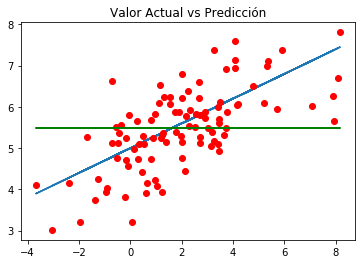

In [11]:
%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.title("Valor Actual vs Predicción")

In [12]:
data["SSR"] = (data["y_prediccion"] - np.mean(y_act)) ** 2

In [13]:
data["SSD"] = (data["y_prediccion"] - data["y_actual"]) ** 2

In [14]:
data["SST"] = (data["y_actual"] - np.mean(y_act)) ** 2

In [15]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,2.681956,6.613609,5.804587,0.107310,0.654518,1.291871
1,1.231000,5.314396,5.369300,0.011600,0.003014,0.026441
2,-1.679159,5.279352,4.496252,0.961874,0.613245,0.039066
3,2.016774,6.784882,5.605032,0.016391,1.392045,1.710544
4,-1.252974,4.259489,4.624108,0.727432,0.132947,1.482343


In [16]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [17]:
SSR  ##Suma de los cuadrados de la regresión

50.722881219253615

In [18]:
SSD  ##suma de los cuadrados de las diferencias

54.03378513708357

In [19]:
SST  ##suma de los cuadrados totales

95.05398178966652

In [20]:
y_pred

array([5.80458669, 5.36929993, 4.49625238, 5.60503224, 4.62410771,
       5.91080444, 6.11927158, 5.8755612 , 5.64761823, 5.97558362,
       4.86889603, 5.19165787, 5.18490221, 5.46132563, 5.80488429,
       6.43088519, 5.15135515, 6.2227814 , 5.52914466, 5.57000177,
       4.93374741, 5.63309686, 4.94455282, 5.60226565, 6.03115204,
       7.42053995, 4.88918994, 6.09559447, 7.45115102, 5.2930389 ,
       4.71697763, 5.69749487, 5.58938278, 5.37064919, 5.13624669,
       5.36340567, 5.39487997, 6.02100888, 4.78433278, 5.6804952 ,
       5.81260357, 5.93672941, 4.98902541, 4.40994625, 5.09717689,
       4.28272619, 6.5565275 , 5.87177991, 4.0825257 , 4.83058867,
       5.24418599, 7.38153888, 5.8121023 , 5.09409959, 6.03656432,
       6.12933672, 6.04521361, 6.24332516, 6.60685836, 5.15888988,
       5.03872447, 5.24635574, 5.41804649, 4.84261731, 5.38684866,
       7.36287183, 4.58540502, 5.75699072, 5.51965119, 5.67378552,
       4.85324376, 5.26893955, 4.77976983, 5.33196518, 3.89524

### Caso ideal
* SSD = 0
* SSR = SST

### R²
R² = SSR / SST < 1

In [21]:
R2 = SSR / SST

In [22]:
R2

0.5336218458632501

(array([ 1.,  4.,  7., 15., 13., 23., 13., 13.,  9.,  2.]),
 array([-1.85070906, -1.48530612, -1.11990317, -0.75450023, -0.38909728,
        -0.02369434,  0.34170861,  0.70711156,  1.0725145 ,  1.43791745,
         1.80332039]),
 <a list of 10 Patch objects>)

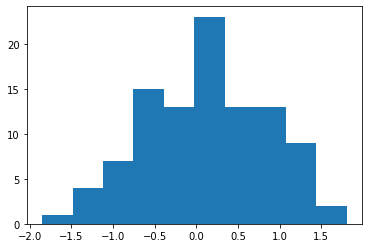

In [23]:
plt.hist(data["y_prediccion"] - data["y_actual"])

## Obtener la recta de regresión
* y = a + bx
* b = sum((xi - x_m) * (yi - y_m)) / sum((xi-x_m)²)
* a = y_n - b * x_m

In [24]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean , y_mean

(1.9469433615998029, 5.477004156649172)

In [25]:
data["beta_n"] = (data["x"] - x_mean) * (data["y_actual"] - y_mean) #covarianza
data["beta_d"] = (data["x"] - x_mean) ** 2 #varianza

In [26]:
beta = sum(data["beta_n"]) / sum(data["beta_d"])

In [27]:
alpha = y_mean - beta * x_mean

In [28]:
alpha, beta

(4.936568703471319, 0.2775814971493456)

El modelo lineal obtenido por regresión es: y = 5.012584203324144 + 1.8755946545807156 * x

In [29]:
data["y_model"] = alpha + beta * data["x"]

In [30]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,2.681956,6.613609,5.804587,0.107310,0.654518,1.291871,0.835419,0.540243,5.681030
1,1.231000,5.314396,5.369300,0.011600,0.003014,0.026441,0.116418,0.512575,5.278271
2,-1.679159,5.279352,4.496252,0.961874,0.613245,0.039066,0.716708,13.148616,4.470465
3,2.016774,6.784882,5.605032,0.016391,1.392045,1.710544,0.091330,0.004876,5.496388
4,-1.252974,4.259489,4.624108,0.727432,0.132947,1.482343,3.895948,10.239473,4.588766


In [31]:
SSR = sum( (data["y_model"] - y_mean) ** 2) #suma de los cuadrados de la regresión
SSD = sum( (data["y_model"] - data["y_actual"]) ** 2 ) #suma de los cuadrados de la diferencia
SST = sum( (data["y_actual"] - np.mean(y_act)) ** 2 ) #suma de los cuadrados totales 

In [32]:
SSR, SSD, SST

(42.443634847922304, 52.61034694174417, 95.05398178966652)

In [33]:
R2 = SSR / SST
R2

0.4465213771038093

Text(0.5, 1.0, 'Valor actual vs predicción')

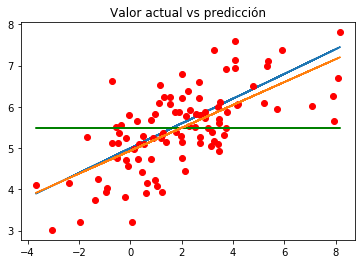

In [34]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(x, y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x, y_mean, "g")
plt.plot(data["x"], data ["y_model"])
plt.title("Valor actual vs predicción")

## Error estandar de los residuos (RSE)


In [35]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE  ##cuando menor sea el valor, mejor será el modelo

0.7326938480127677

In [36]:
np.mean(data["y_actual"])

5.477004156649172

In [39]:
RSE * 100. / np.mean(data["y_actual"])   ##porcentaje de error

13.377639071594743